Revenue Growth Factor: 18% of prior period Revenue

EBITDA Margin: 45.0% of current Revenue

Taxes: 21% of current EDBITDA

Capital Expenditures: 3% of current Revenue

Working Capital Increase: 6% of Revenue

EBITDA Exit Multiple: 32.70

Discount Factor: 0.94 (6%). 

We would like a ten year model starting in 2022 to 2032.

Your starting baseline historical Revenue is 222 for the FY 2021 (assume it's over for now). 

Parameters:  Values

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Dates= ['2021','2022', '2023', '2024', '2025', '2026', '2027','2028', '2029','2030', '2031','2032' ]
Revenue = pd.Series(index=Dates, dtype='float64')
Revenue['2021'] = 222
#Revenue

In [3]:
growth_rate = 0.18
for year in range(1, 12):
    Revenue[year] = Revenue[year - 1] * (1 + growth_rate)
#Revenue   

In [4]:
ebitda_margin = 0.45
ebitda = Revenue * ebitda_margin 
#ebitda

In [5]:
tax_rate = 0.21
taxes = -ebitda * tax_rate
#taxes

In [6]:
capex_percent = 0.03
capital_expenditures = -(Revenue * capex_percent)
#capital_expenditures

In [7]:
nwc_percent = 0.06
nwc = -Revenue * nwc_percent
#nwc

In [8]:
cash_flow = ebitda + taxes + capital_expenditures + nwc
#cash_flow

In [9]:
discount_rate = 0.06
discount_factor= pd.Series(index=Dates, dtype='float64')

for year in range(0, 12):
    discount_factor[year]= (1 / (1 + discount_rate)) ** year
#discount_factor

In [10]:
#Present Value of Future Cash Flow
pv_of_fcf = (cash_flow * discount_factor)
#pv_of_fcf

In [11]:
data = {'revenue': Revenue,
        'EBITDA':ebitda, 
        'taxes':taxes, 
        'cap_ex':capital_expenditures, 
         'work_cap':nwc,
        'cash_flow':cash_flow, 
        'discount_factor': discount_factor, 
        'present_value_fcf':pv_of_fcf }
df = pd.DataFrame(data, index= Dates)  
df

,revenue,EBITDA,taxes,cap_ex,work_cap,cash_flow,discount_factor,present_value_fcf
2021,222.000000,99.900000,-20.979000,-6.660000,-13.320000,58.941000,1.000000,58.941000
2022,261.960000,117.882000,-24.755220,-7.858800,-15.717600,69.550380,0.943396,65.613566
2023,309.112800,139.100760,-29.211160,-9.273384,-18.546768,82.069448,0.889996,73.041517
2024,364.753104,164.138897,-34.469168,-10.942593,-21.885186,96.841949,0.839619,81.310368
2025,430.408663,193.683898,-40.673619,-12.912260,-25.824520,114.273500,0.792094,90.515315
2026,507.882222,228.547000,-47.994870,-15.236467,-30.472933,134.842730,0.747258,100.762332
2027,599.301022,269.685460,-56.633947,-17.979031,-35.958061,159.114421,0.704961,112.169388
2028,707.175206,318.228843,-66.828057,-21.215256,-42.430512,187.755017,0.665057,124.867810
2029,834.466743,375.510034,-78.857107,-25.034002,-50.068005,221.550920,0.627412,139.003788
2030,984.670757,443.101841,-93.051387,-29.540123,-59.080245,261.430086,0.591898,154.740066


In [12]:
#total present value of Future Cash Flows
t_pv_of_fcf = pv_of_fcf.sum()
t_pv_of_fcf

1364.9816538112213

In [13]:
#terminal_value 
ebitda_exit_multiple = 32.70
terminal_value = (ebitda_exit_multiple*ebitda[11])
terminal_value

20175.082590019254

In [14]:
#present_assets_value
present_assets_value = (t_pv_of_fcf + terminal_value)
present_assets_value

21540.064243830475

In [15]:
print(f"""Our projected Present Value of Projected Future Cash Flows are:{t_pv_of_fcf:.2f}.\n
We are providing revenue guidance in 2032 to be: {Revenue['2032']:.2f}.
      \nWith an estimated EBITDA around:{ebitda['2032']:.2f}.""")


Our projected Present Value of Projected Future Cash Flows are:1364.98.

We are providing revenue guidance in 2032 to be: 1371.06.
      
With an estimated EBITDA around:616.98.


In [16]:
print(f"""The terminal value at this time given a multiple of {ebitda_exit_multiple:.2f} 
\nand the above EBITDA for 2032, would equal: {terminal_value:.2f}.""")

The terminal value at this time given a multiple of 32.70 

and the above EBITDA for 2032, would equal: 20175.08.


Text(0, 0.5, 'Cash Flow')

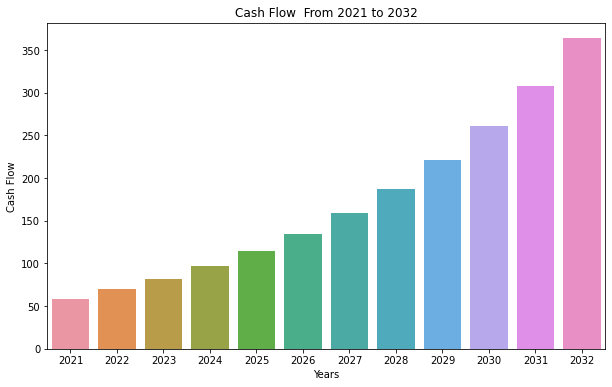

In [17]:
plt.figure(figsize=(10,6))

# Add title
plt.title("Cash Flow  From 2021 to 2032")

# Bar chart 
sns.barplot(x=df.index, y=df['cash_flow'])

# Add label for vertical axis
plt.xlabel("Years")
plt.ylabel("Cash Flow")